In [15]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyserial times numpy pandas xlsxwriter matplotlib sklearn deap

  Running setup.py bdist_wheel for deap: started
  Running setup.py bdist_wheel for deap: finished with status 'done'
  Stored in directory: C:\Users\Víctor\AppData\Local\pip\Cache\wheels\22\ea\bf\dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built deap


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import serial
from time import time
import numpy as np
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt

In [109]:
ser = serial.Serial('COM3', 9600)

start_time = time()
timepoints = []
inputData = []
outputData = []
duration = 100 #total seconds to collect data

# flush any junk left in the serial buffer
ser.flushInput()
# ser.reset_input_buffer() # for pyserial 3.0+
run = True

# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    data = ser.readline().decode("utf-8").split(' ')
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        inputData.append(float(data[0]))
        outputData.append(float(data[1]))
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration:
            run=False
    
    # if the try statement throws an error, just do nothing
    except: pass

ser.close()

In [116]:
T_rate = 150 * 0.03264
T_rate

4.896000000000001

In [111]:
inputMax = max(inputData)
inputData = list(map(lambda x: x / inputMax, inputData))

In [112]:
outputMax = max(outputData)
outputData = list(map(lambda x: x / outputMax, outputData))

In [113]:
len(inputData)

439

In [114]:
sampleNum = 140
L = len(inputData[sampleNum:])
t = np.linspace(0, L, num=L)

<function matplotlib.pyplot.show(*args, **kw)>

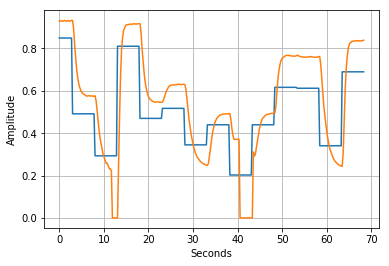

In [115]:
plt.figure()
plt.plot(t*T_rate,inputData[sampleNum:],t*T_rate,outputData[sampleNum:])
plt.ylabel(r'Amplitud (V)')
plt.xlabel(r'Segundos (s)')
plt.grid()
plt.show

In [23]:
ydata_par = inputData
ydata_impar = outputData

workbook = xlsxwriter.Workbook('motor.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'time')
worksheet.write('B1', 'y')
worksheet.write('C1', 'u')

k  = 1
Ts = 0.22848

for output, entry in zip(ydata_par, ydata_impar):
    worksheet.write(k, 0, Ts * k)
    worksheet.write(k, 1, output)
    worksheet.write(k, 2, entry)
    k += 1
    
workbook.close()

NameError: name 'inputData' is not defined

In [79]:
x = pd.read_excel('motorr.xlsx')
x = x.drop('time', axis=1)
x = x.drop('y0', axis=1)
x = x.drop('Unnamed: 4', axis=1)
x

,u,y
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,0,0.000000
9,0,0.000000


In [80]:
max(x["y"])

395.36943545427545

In [81]:
L = len(x)

In [82]:
q1 = pd.DataFrame()
q1['u1'] = pd.Series(x['u'], index=x.index)
q1['y1'] = pd.Series(x['y'], index=x.index)
q1 = q1.shift(periods=-1, freq=None, axis=0)

x['u1'] = pd.Series(q1['u1'], index=x.index)
x['y1'] = pd.Series(q1['y1'], index=x.index)

q2 = pd.DataFrame()
q2['u2'] = pd.Series(x['u'], index=x.index)
q2['y2'] = pd.Series(x['y'], index=x.index)
q2 = q2.shift(periods=-2, freq=None, axis=0)

x['u2'] = pd.Series(q2['u2'], index=x.index)
x['y2'] = pd.Series(q2['y2'], index=x.index)

q3 = pd.DataFrame()
q3['u3'] = pd.Series(x['u'], index=x.index)
q3['y3'] = pd.Series(x['y'], index=x.index)
q3 = q3.shift(periods=-3, freq=None, axis=0)

x['u3'] = pd.Series(q3['u3'], index=x.index)
x['y3'] = pd.Series(q3['y3'], index=x.index)

q4 = pd.DataFrame()
q4['u4'] = pd.Series(x['u'], index=x.index)
q4['y4'] = pd.Series(x['y'], index=x.index)
q4 = q4.shift(periods=-4, freq=None, axis=0)

x['u4'] = pd.Series(q4['u4'], index=x.index)
x['y4'] = pd.Series(q4['y4'], index=x.index)

'''
q5 = pd.DataFrame()
q5['input5'] = pd.Series(x['input'], index=x.index)
q5['y5'] = pd.Series(x['output'], index=x.index)
q5 = q5.shift(periods=-5, freq=None, axis=0)

x['input5'] = pd.Series(q5['input5'], index=x.index)
x['y5'] = pd.Series(q5['y5'], index=x.index)
'''

x = x.drop(x.index[L-4:L])

#y = x['antihorapos']
y = pd.DataFrame()
y['y'] = x['y']

x = x.drop('y', axis=1)

x

,u,u1,y1,u2,y2,u3,y3,u4,y4
0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [83]:
(y['y'])

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14         0.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25        94.074992
26       224.623875
27       298.090019
28       332.726078
29       345.747979
            ...    
17819    136.282289
17820    181.599763
17821    260.893562
17822    311.111920
17823    334.076963
17824    344.679838
17825    348.920988
17826    349.502183
17827    349.690678
17828    349.753510
17829    349.800634
17830    350.743112
17831    351.277183
17832    350.381829
17833    349.297979
17834    349.706386
17835    349.313687
17836    349.486475
17837    350.633156


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [85]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
model.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
model.score(x_test,y_test)

0.9688492425904817

In [88]:
predicted = model.predict(x_test)

([array([ 176., 1220.,  215.,  471.,  533.,  770.,  880., 1196., 1598.,
           81.]),
  array([   0., 1385.,  232.,  462.,  610.,  742.,  828., 1113., 1609.,
          159.])],
 array([-50.95797342,  -4.72860441,  41.5007646 ,  87.73013362,
        133.95950263, 180.18887164, 226.41824065, 272.64760966,
        318.87697867, 365.10634768, 411.33571669]),
 <a list of 2 Lists of Patches objects>)

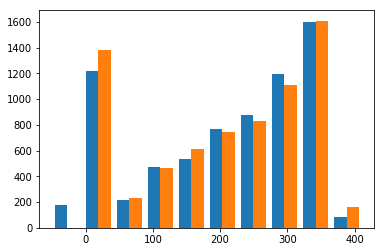

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test['y']])

In [90]:
from deap import base, creator
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,))

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

C:\Users\Víctor\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'ControllerFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Víctor\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Controller' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [91]:
import random
from deap import tools

IND_SIZE = 30 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [100]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (10 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (10 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (10 - 0) / (pow(2,10) - 1) )
    
    # =====================================================================================================
    pid1 = 0
    pid2 = 0
    pid3 = 0
    pid4 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    y3 = 0
    y4 = 0
    
    E = []

    setPoint = 250
    Ts = 0.22848
    
    for k in np.arange(1000):      
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid4 = pid3
        pid3 = pid2
        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < 0):
            pid0 = 0
        else:
            pid0 = pid0
        
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm3': [pid3], 'y3': [y3], 'pwm4': [pid4], 'y4': [y4]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 395.36943545427545):
            y = 395.36943545427545
        elif (y < 0):
            y = 0
        else:
            y = y
            
        y1 = y
        y2 = y1
        y3 = y2
        y4 = y3
        
        error0 = setPoint - y
        E.append(error0)
    
    total_error = sum(map(abs, E))
    
    print([total_error])
    
    return (total_error),

In [101]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [102]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 40

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)

    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [103]:
kx = main()

[5952.157857759012]
[188043.7265572293]
[5617.468418357028]
[981.5164844796989]
[1102.0402492820713]
[117816.98749313244]
[148046.08022921876]
[102164.97091109339]
[3002.40804178456]
[2226.4317023988833]
[24823.640927812292]
[159482.21236066282]
[170383.70200414569]
[182506.03216906657]
[179177.94079441286]
[122172.84073828027]
[1489.2035501738433]
[161982.39123374893]
[153172.12914740606]
[156536.70599181208]
[177472.6576760294]
[1324.0505926360343]
[3589.184950620317]
[130924.7815132661]
[182740.45576366773]
[1818.8144936144768]
[182211.76891953434]
[140611.36241938153]
[975.5774794302301]
[1413.5364120951817]
[184667.34245312208]
[112188.46678539403]
[153555.74976881046]
[114855.6901255712]
[181606.47490563765]
[2393.720366842935]
[150684.16927436594]
[999.0213286047219]
[2058.3977048813194]
[167528.2837519602]
[1353.5599649179044]
[1723.0377982429586]
[981.5164844796989]
[981.5164844796989]
[5206.93069446171]
[1478.1799931261771]
[174697.02277491035]
[30647.362303737624]
[25188.749

[948.1744408074371]
[941.6723572110329]
[936.5462563049269]
[941.6723572110329]
[941.6723572110329]
[941.6723572110329]
[949.0257279508937]
[949.0257279508937]
[969.7210546577433]
[934.1189149587631]
[979.9320823260409]
[949.0257279508937]
[927.1043015292457]
[936.1972075960243]
[972.6376137353545]
[937.5977314823285]
[941.6723572110329]
[941.6723572110329]
[967.4569684483849]
[941.6723572110329]
[962.2769209251383]
[949.0257279508937]
[941.6723572110329]
[941.6723572110329]
[949.0257279508937]
[941.6723572110329]
[949.0257279508937]
[949.0257279508937]
[1222.6319310799872]
[941.6723572110329]
[941.6723572110329]
=START=================================================================
[(948.1744408074371,), (941.6723572110329,), (936.5462563049269,), (941.6723572110329,), (941.6723572110329,), (941.6723572110329,), (949.0257279508937,), (949.0257279508937,), (969.7210546577433,), (934.1189149587631,), (979.9320823260409,), (949.0257279508937,), (927.1043015292457,), (936.1972075960243,)

[914.8626919382809]
[924.9013364924538]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[928.8276518815383]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[915.009005561637]
[914.6313155374999]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[914.8626919382809]
[915.1596442598711]
[914.8626919382809]
[914.3645818679929]
[914.8626919382809]
[914.3645818679929]
[914.8626919382809]
[914.3645818679929]
[914.6313155374999]
[915.009005561637]
=START=================================================================
[(914.8626919382809,), (924.9013364924538,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (928.8276518815383,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (914.8626919382809,), (

[911.7795448202626]
[912.7572268764404]
[911.7795448202626]
[911.5896013596509]
[912.7572268764404]
[917.0316290507453]
[911.7795448202626]
[911.5896013596509]
[911.7795448202626]
[912.7572268764404]
[911.7795448202626]
[911.7795448202626]
[912.7572268764404]
[912.7572268764404]
[912.7572268764404]
[912.7572268764404]
[1852.8408839181416]
[911.7795448202626]
[911.7795448202626]
[911.7795448202626]
[911.7795448202626]
[911.7795448202626]
[911.7795448202626]
[911.7795448202626]
[911.5896013596509]
[912.7572268764404]
[917.0316290507453]
[912.7572268764404]
[911.7795448202626]
[913.690737066685]
[911.7795448202626]
=START=================================================================
[(911.7795448202626,), (912.7572268764404,), (911.7795448202626,), (911.5896013596509,), (912.7572268764404,), (917.0316290507453,), (911.7795448202626,), (911.5896013596509,), (911.7795448202626,), (912.7572268764404,), (911.7795448202626,), (911.7795448202626,), (912.7572268764404,), (912.7572268764404,),

[910.5966422797201]
[911.0636388484872]
[5525.551217011826]
[910.8950887980443]
[911.0636388484872]
[910.5966422797201]
[911.0636388484872]
[3343.6965132138216]
[911.0636388484872]
[910.5966422797201]
[1545.043293043549]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.8950887980443]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[911.0636388484872]
[910.5966422797201]
[910.5966422797201]
=START=================================================================
[(910.5966422797201,), (911.0636388484872,), (5525.551217011826,), (910.8950887980443,), (911.0636388484872,), (910.5966422797201,), (911.0636388484872,), (3343.6965132138216,), (911.0636388484872,), (910.5966422797201,), (1545.043293043549,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.8950887980443,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (911.0636388484872,), (91

[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
=START=================================================================
[(910.5966422797201,), (910.5966422797201,), (910.674940483218,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (1007.9782526808776,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (1842.3001220809288,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,)]
=END===================================================================
[910.596

[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[6058.276442140488]
[910.5966422797201]
[951.0020083710365]
[1750.3253726139048]
[1842.3001220809288]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[925.0627413682503]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
[910.5966422797201]
=START=================================================================
[(910.5966422797201,), (966.716574381702,), (1379.6170698276728,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (6058.276442140488,), (910.5966422797201,), (951.0020083710365,), (1750.3253726139048,), (1842.3001220809288,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (910.5966422797201,), (925.0627413682503,), (910.5966422797201,), (910.5966422797201,), (910.596642279720

In [104]:
for bits in kx:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1 - 0) / (pow(2,10) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])

[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]

In [105]:
controller = ''.join(map(str,kx[1]))
    
# PID controller
_kp = int(controller[0:10],2)
_ki = int(controller[10:20],2)
_kd = int(controller[20:30],2)

kp = 0 + _kp * ( (1 - 0) / (pow(2,10) - 1) )
ki = 0 + _ki * ( (1 - 0) / (pow(2,10) - 1) )
kd = 0 + _kd * ( (1 - 0) / (pow(2,10) - 1) )
    
print([_kp,_ki,_kd,kp,ki,kd])

[63, 767, 296, 0.06158357771260997, 0.7497556207233627, 0.28934506353861195]
